# Cálculo com Python

Nesta terceira parte do curso vamos estudar como usar o [Python](https://www.python.org/) para computar derivadas de funções de uma variável.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/phkonzen/notas/master?filepath=%2Fsrc%2FMiniCalcPy)

## 3 - Derivadas

Aqui, vamor aprender a usar a biblioteca [Python](https://www.python.org/) de matemática simbólica [Sympy](http://www.sympy.org/) para computar:

+ **derivadas**

+ **retas tangentes**

+ **derivadas de ordem mais altas**

+ **máximos e mínimos**

Começamos carrendo a biblioteca [SymPy](http://www.sympy.org):

In [1]:
from sympy import *
init_printing()
var('x,y')

Para fixar as ideias, vamos continuar trabalhando com a função: 

$f(x) = (x^3 - 3x + 2)e^{-x/4} - 1$.

In [2]:
f = Lambda(x, (x**3 - 3*x + 2)*exp(-x/4) - 1)
f

### Derivadas

Vamos ver como podemos usar o [SymPy](http://www.sympy.org/) para computarmos a derivada da função $f$, i.e.

$\displaystyle f' = \frac{d f}{d x}$.

Para tanto, usamos a função [`diff`](https://docs.sympy.org/latest/modules/core.html?highlight=diff#sympy.core.function.diff):

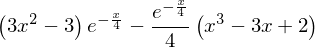

In [3]:
diff(f(x), x)

Para avaliar a derivada em um ponto, por exemplo, para calcular $f'(1)$, digitamos:

In [4]:
diff(f(x),x).subs(x,1)

Também, podemos definir a função derivada de $f$ com o seguinte código:

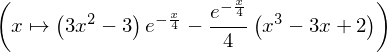

In [5]:
fl = Lambda(x, diff(f(x),x))
fl

Com isso, $f'(1)$ pode ser computada com:

In [6]:
fl(1)

#### Exercício:

Sendo $g(x) = x^2 + \frac{1}{2}$ calcule $g'(1)$.

In [7]:
#digite sua solução aqui!

### Reta Tangente

Aqui, vamos ver como computar a reta tangente ao gráfico da função $f$ no ponto $\displaystyle x_0 = -\frac{1}{2}$. Lembremos que tal reta tangente tem equação:

$y = f'(x_0)(x - x_0) + f(x_0)$.

Assim sendo, podemos definir a função affim cujo gráfico é a reta tangente com o seguinte comando:

In [8]:
x0 = -1/2
r = Lambda(x, fl(x0)*(x-x0) + f(x0))
r

Vejamos os gráficos de $f(x)$ e da reta tangente computada.

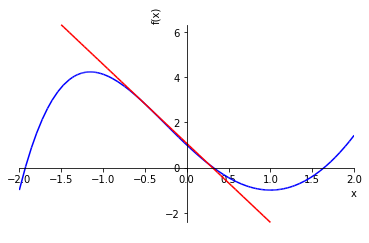

In [9]:
%matplotlib inline
p = plot(f(x), (x,-2,2), line_color='blue', show=False)
q = plot(r(x), (x,-1.5,1), line_color='red', show=False)
p.extend(q)
p.show()

$\blacktriangleleft$

#### Exercício:

Encontre a reta tangente ao gráfico de $y = \frac{1}{x}$ em $x=1$. Faça os esboços dos gráficos da função e da reta tangente em um mesmo gráfico.

In [10]:
#digite a resolução aqui.

### Derivadas de ordem mais altas

Similarmente a derivadas de primeira ordem, as derivadas de ordem mais alta podem ser obtidas com a função [`diff`](https://docs.sympy.org/latest/modules/core.html?highlight=diff#sympy.core.function.diff). Por exemplo, para computarmos

$\displaystyle f'' = \frac{d^2 f}{d x^2}$

digitamos:

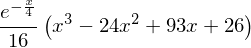

In [11]:
diff(f(x), x, 2)

#### Exercício

Calcule:

$\frac{d^3}{d x^3}\left(\frac{x^2 - 1 + \text{sen}\,x}{x^3 - 3x + 1}\right)$.

In [12]:
#digite sua resposta aqui!

### Máximos e Mínimos Locais

Agora, vamos ver como podemos usar o que aprendemos até aqui para resolver problemas de máximos e mínimos. Nosso objetivo será encontrar e determinar os pontos de máximos e mínimos locais da função $f$. Para tanto, vamos usar o teste da segunda derivada.

Comecemos lembrando do gráfico de $f$:

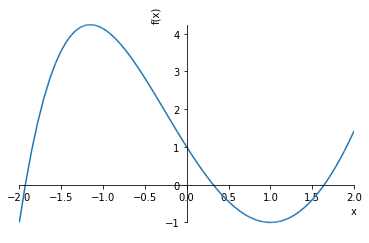

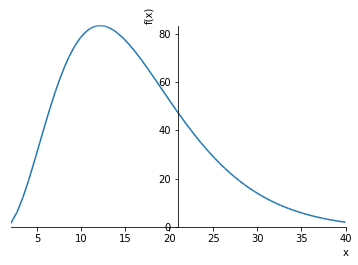

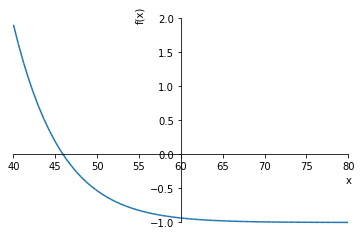

In [13]:
plot(f(x), (x,-2,2))
plot(f(x), (x,2,40))
plot(f(x), (x,40,80))

Observando os gráficos, podemos inferir que $f$ tem máximos locais próximos a $x=-1$ e $x=10$ e um mínimo local próximo do ponto $x=1$. Logo, podemos usar estes valores como parâmetro da função [`nsolve`](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve) para resolvermos

$f'(x) = 0$.

Computamos:

In [14]:
#ponto crítico próx. de x=-1
x1 = nsolve(fl(x), x, -1)
x1

In [15]:
#ponto crítico próx. de x=1
x2 = nsolve(fl(x), x, 1)
x2

In [16]:
#ponto crítico próx. de x=10
x3 = nsolve(fl(x), x, 10)
x3

Ok. Acamos de encontrar os pontos críticos de $f(x)$ (podem haver outros pontos críticos?). Por inspesão gráfica, vemos que $x_1 \approx -1,15$ e $x_3 \approx 12,15$ são os pontos de máximos locais de $f(x)$, com $x_3$ ponto de máximo global? O ponto $x_2 = 1$ é ponto de mínimo local?

Podemos responder parcialmente estas questões com o teste da segunda derivada. Vejamos:

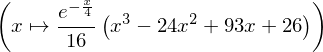

In [17]:
# f''
fll = Lambda(x, diff(f(x), x, 2))
fll

In [18]:
fll(x1)

In [19]:
fll(x2)

In [20]:
fll(x3)

Logo, pelo teste da segunda derivada, confirmamos que $x_1 \approx -1,15$ e $x_3 \approx 12,15$ são os pontos de máximos locais e $x_2=1$ é ponto de mínimo local. As demais questões em aberto ficam de exercício!

#### Exercício

Referente ao problema de otimização que acabamos de discutir, responda:

(a) Os pontos $x_1$, $x_2$ e $x_3$ calculados acima são os únicos pontos críticos de $f(x)$? Justifique sua resposta.

(b) Quais são os pontos de mínimo e máximo globais de $f(x)$?

(c) Qual é o maior valor que $f(x)$ assume? E qual é o menor?

In [21]:
#digite sua solução aqui!

**Exercício**

Compute e identifique os pontos extremos da função $g(x) = x^4-4x^3+4x^2$ restrita ao intervalo $[-1, 3]$.

In [22]:
#digite sua solução aqui!

## Referências

+ [1] Python Software Fundation (US): [www.python.org](https://www.python.org/)

+ [2] Sympy - Python Library for Symbolic Mathematics: [www.sympy.org](http://www.sympy.org/)

## Related links

+ [1] Sympy Gamma: [www.sympygamma.org](http://www.sympygamma.com/)
+ [2] Sympy Live: [live.sympy.org](http://live.sympy.org/)

#### Próxima parte: 4 - Integral

Criado: Out/2015 Última modificação: Out/2019